# EEG Decoding Tutorial - Session 1

The goal of this notebook is to demonstrate basic decoding technique

Todo list:

* turn off warnings or solve the following issues:
    cv, dcim
    
* mark eeg and eog
* add the demonstration of learned patterns
* add more comments
* make a slide to illustrate experimental design
* explain triggers

### required libraries

In [1]:
%matplotlib inline

import numpy as np                # data array manipulation 
import matplotlib.pyplot as plt   # data visulization 

import mne                        # eeg toolbox


### helper functions

In [2]:
# read event_id from a .csv file
def read_event_id(fname):
    event_id = dict()
    with open(fname, encoding='utf-8-sig') as f:
        for line in f:
            label, id_ = line.strip().split(',')
            event_id[label] = int(id_)
    return event_id

## Experimental Designs

In [3]:
num_events = 60

animate_ids = np.concatenate([np.arange(1, 16), np.arange(31, 46)])
print(f'animate ids:\n {animate_ids}')


animate ids:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


## From Raw to Epochs

In this section, we will transform the eeg data from Raw format to Epochs format, so that we can run decoding later.

steps:

1. load raw eeg data
2. extract event information
3. make epochs

### load raw eeg data

In [4]:
# raw eeg file
fname = './original-raw.fif'

# load eeg data
raw = mne.io.read_raw_fif(fname, preload=True)

Opening raw data file ./original-raw.fif...
Isotrak not found
    Range : 1117000 ... 2211399 =   2234.000 ...  4422.798 secs
Ready.
Reading 0 ... 1094399  =      0.000 ...  2188.798 secs...


 ### extract event information

In [5]:
# extract all trigger annotations from raw
triggers, trigger_id = mne.events_from_annotations(raw)

Non-RawBrainVision raw using branvision markers
Used Annotations descriptions: ['Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S  8', 'Stimulus/S  9', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 16', 'Stimulus/S 17', 'Stimulus/S 18', 'Stimulus/S 19', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 24', 'Stimulus/S 25', 'Stimulus/S 26', 'Stimulus/S 27', 'Stimulus/S 28', 'Stimulus/S 29', 'Stimulus/S 30', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 33', 'Stimulus/S 34', 'Stimulus/S 35', 'Stimulus/S 36', 'Stimulus/S 37', 'Stimulus/S 38', 'Stimulus/S 39', 'Stimulus/S 40', 'Stimulus/S 41', 'Stimulus/S 42', 'Stimulus/S 43', 'Stimulus/S 44', 'Stimulus/S 45', 'Stimulus/S 46', 'Stimulus/S 47', 'Stimulus/S 48', 'Stimulus/S 49', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 53', 'Stimulus/S 54', 'S

In [7]:
# 
events = triggers[np.where(triggers[:, -1] <= num_events)]
events

array([[1132146,       0,      15],
       [1132645,       0,      37],
       [1133145,       0,       6],
       ...,
       [2204102,       0,      43],
       [2204602,       0,      49],
       [2205102,       0,      56]])

In [8]:
event_id = read_event_id('events.csv')
event_id

{'big/animate/object001': 1,
 'big/animate/object002': 2,
 'big/animate/object003': 3,
 'big/animate/object004': 4,
 'big/animate/object005': 5,
 'big/animate/object006': 6,
 'big/animate/object007': 7,
 'big/animate/object008': 8,
 'big/animate/object009': 9,
 'big/animate/object010': 10,
 'big/animate/object011': 11,
 'big/animate/object012': 12,
 'big/animate/object013': 13,
 'big/animate/object014': 14,
 'big/animate/object015': 15,
 'big/inanimate/object016': 16,
 'big/inanimate/object017': 17,
 'big/inanimate/object018': 18,
 'big/inanimate/object019': 19,
 'big/inanimate/object020': 20,
 'big/inanimate/object021': 21,
 'big/inanimate/object022': 22,
 'big/inanimate/object023': 23,
 'big/inanimate/object024': 24,
 'big/inanimate/object025': 25,
 'big/inanimate/object026': 26,
 'big/inanimate/object027': 27,
 'big/inanimate/object028': 28,
 'big/inanimate/object029': 29,
 'big/inanimate/object030': 30,
 'small/animate/object031': 31,
 'small/animate/object032': 32,
 'small/animate

### make epochs

In [9]:
# 
tmin, tmax = -0.1, 0.9
#
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, decim=5)

1440 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


<ipython-input-9-f5b0ec2d719d>:6: RuntimeWarning: The measurement information indicates a low-pass frequency of 250 Hz. The decim=5 parameter will result in a sampling frequency of 100 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, events, event_id, tmin, tmax, decim=5)


In [10]:
epochs.save('original-epo.fif')

Loading data for 1440 events and 501 original time points ...


<ipython-input-10-40d0d8b4121c>:1: DeprecationWarning: overwrite defaults to True in 0.18 but will change to False in 0.19, set it explicitly to avoid this warning
  epochs.save('original-epo.fif')


0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
Loading data for 1440 events and 501 original time points ...


## Animacy Decoding

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from mne.decoding import SlidingEstimator, cross_val_multiscore

### prepare data

In [87]:
X = epochs.get_data()
y = np.isin(epochs.events[:, -1], animate_ids)
X.shape

Loading data for 1440 events and 501 original time points ...


(1440, 31, 101)

dimensions of X: `samples`, `channels`, `time`

In [42]:
from mne.decoding import Vectorizer
clf = make_pipeline(Vectorizer(), StandardScaler(),
                    LinearDiscriminantAnalysis())

sl = SlidingEstimator(clf)

In [52]:
scores_time_decoding = cross_val_multiscore(sl, X, y, cv=5)

[........................................] 100.00% Fitting SlidingEstimator |  
[........................................] 100.00% Fitting SlidingEstimator |  
[........................................] 100.00% Fitting SlidingEstimator |  
[........................................] 100.00% Fitting SlidingEstimator |  
[........................................] 100.00% Fitting SlidingEstimator |  


In [44]:
scores_time_decoding.shape

(5, 101)

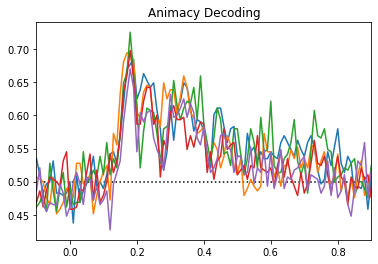

In [66]:
fig, ax = plt.subplots()
ax.plot(epochs.times, scores_time_decoding.T)
ax.set_xlim(tmin, tmax)
ax.hlines(0.5, tmin, tmax, linestyle=':')
ax.set_title('Animacy Decoding')
plt.show()

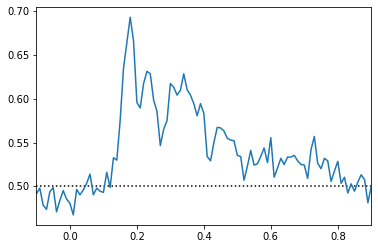

In [64]:
fig, ax = plt.subplots()
ax.plot(epochs.times, scores_time_decoding.mean(0))
ax.set_xlim(tmin, tmax)
ax.hlines(0.5, tmin, tmax, linestyle=':')
plt.show()

In [89]:
from sklearn.model_selection import GroupKFold


X = epochs.get_data()
y = np.isin(epochs.events[:, -1], animate_ids)
groups = epochs.events[:, -1]

gkf = GroupKFold()
sl = SlidingEstimator(clf)

scores_time_decoding = cross_val_multiscore(sl, X, y, groups=groups, cv=gkf)



Loading data for 1440 events and 501 original time points ...
[                                        ]   0.00% Fitting SlidingEstimator |  

/Users/ruosi/anaconda3/envs/mne/lib/python3.7/site-packages/sklearn/model_selection/_split.py:503: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


[........................................] 100.00% Fitting SlidingEstimator |  
[........................................] 100.00% Fitting SlidingEstimator |  
[........................................] 100.00% Fitting SlidingEstimator |  


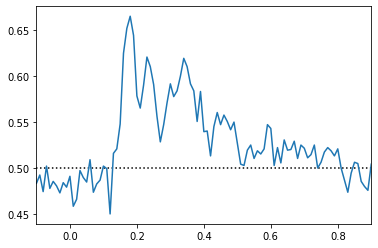

In [90]:
fig, ax = plt.subplots()
ax.plot(epochs.times, scores_time_decoding.mean(0))
ax.set_xlim(tmin, tmax)                         # set the x axis
ax.hlines(0.5, tmin, tmax, linestyle=':')       # add chance level 
plt.show()

In [46]:
from mne.decoding import GeneralizingEstimator
gen = GeneralizingEstimator(clf)
scores_gat = cross_val_multiscore(gen, X, y, cv=5)

[........................................] 100.00% Fitting GeneralizingEstimato
[........................................] 100.00% Scoring GeneralizingEstimato
[........................................] 100.00% Fitting GeneralizingEstimato
[........................................] 100.00% Scoring GeneralizingEstimato
[........................................] 100.00% Fitting GeneralizingEstimato
[........................................] 100.00% Scoring GeneralizingEstimato
[........................................] 100.00% Fitting GeneralizingEstimato
[........................................] 100.00% Scoring GeneralizingEstimato
[........................................] 100.00% Fitting GeneralizingEstimato
[........................................] 100.00% Scoring GeneralizingEstimato


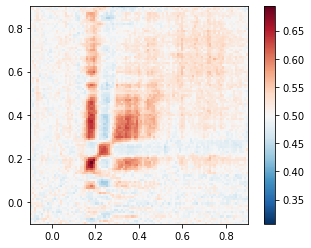

In [51]:
data = scores_gat.mean(0)
vmax = np.abs(data).max()

fig, ax = plt.subplots()
im = ax.imshow(
    data,
    origin="lower", cmap="RdBu_r",
    extent=(tmin, tmax, tmin, tmax),
    vmax=vmax, vmin=1-vmax);

plt.colorbar(im)
plt.show()